In [1]:
# 라이브러리를 불러옵니다.
import pandas as pd

# 깃 허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

# 와인 데이터를 불러옵니다.
df = pd.read_csv("./data/wine.csv", header=None)

# 데이터 확인
df

fatal: destination path 'data' already exists and is not an empty directory.


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [2]:
X= df.iloc[:,0:12]
y= df.iloc[:,12]

In [5]:
# 라이브러리를 불러옵니다.
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# 깃 허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data.git

# 와인 데이터를 불러옵니다.
df = pd.read_csv("./data/wine.csv", header=None)

# 각 속성을 x로, 와인의 종류를 y로 저장합니다.
X= df.iloc[:,0:12]
y= df.iloc[:,12]

# 학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,  shuffle=True)

# 모델의 구조를 설정
model = Sequential() 
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))
model.summary()
  
# 모델을 컴파일 합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델을 실행합니다.
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) 

# 테스트 결과를 출력합니다.
score =model.evaluate(X_test,y_test)
print("Test accuracy : ",score[1])   # model.evaluate함수에서 두가지 값을 돌려주는데 0이 손실 1이 정확도 여기에서는 정확도만 출력


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                390       
                                                                 
 dense_9 (Dense)             (None, 12)                372       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


fatal: destination path 'data' already exists and is not an empty directory.


8/8 [==============================] - 1s 19ms/step - loss: 0.7554 - accuracy: 0.6302 - val_loss: 0.3710 - val_accuracy: 0.8046
Epoch 2/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3480 - accuracy: 0.8237 - val_loss: 0.3939 - val_accuracy: 0.8054
Epoch 3/50
8/8 [==============================] - 0s 4ms/step - loss: 0.3235 - accuracy: 0.8417 - val_loss: 0.3336 - val_accuracy: 0.8492
Epoch 4/50
8/8 [==============================] - 0s 4ms/step - loss: 0.2813 - accuracy: 0.8933 - val_loss: 0.3006 - val_accuracy: 0.8892
Epoch 5/50
8/8 [==============================] - 0s 4ms/step - loss: 0.2636 - accuracy: 0.9115 - val_loss: 0.2811 - val_accuracy: 0.8977
Epoch 6/50
8/8 [==============================] - 0s 4ms/step - loss: 0.2469 - accuracy: 0.9179 - val_loss: 0.2685 - val_accuracy: 0.9062
Epoch 7/50
8/8 [==============================] - 0s 4ms/step - loss: 0.2341 - accuracy: 0.9251 - val_loss: 0.2506 - val_accuracy: 0.9146
Epoch 8/50
8/8 [============================

In [7]:
modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
# 모델이 저장되는 조건을 설정합니다.
modelpath = "./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델을 실행합니다.
history = model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer]) 

# 테스트 결과를 출력합니다.
score =model.evaluate(X_test,y_test)
print("Test accuracy : ",score[1])   # model.evaluate함수에서 두가지 값을 돌려주는데 0이 손실 1이 정확도 여기에서는 정확도만 출력


Epoch 1: saving model to ./data/model/all\01-0.9900.hdf5

Epoch 2: saving model to ./data/model/all\02-0.9892.hdf5

Epoch 3: saving model to ./data/model/all\03-0.9908.hdf5

Epoch 4: saving model to ./data/model/all\04-0.9908.hdf5

Epoch 5: saving model to ./data/model/all\05-0.9838.hdf5

Epoch 6: saving model to ./data/model/all\06-0.9900.hdf5

Epoch 7: saving model to ./data/model/all\07-0.9877.hdf5

Epoch 8: saving model to ./data/model/all\08-0.9892.hdf5

Epoch 9: saving model to ./data/model/all\09-0.9915.hdf5

Epoch 10: saving model to ./data/model/all\10-0.9908.hdf5

Epoch 11: saving model to ./data/model/all\11-0.9885.hdf5

Epoch 12: saving model to ./data/model/all\12-0.9915.hdf5

Epoch 13: saving model to ./data/model/all\13-0.9908.hdf5

Epoch 14: saving model to ./data/model/all\14-0.9885.hdf5

Epoch 15: saving model to ./data/model/all\15-0.9892.hdf5

Epoch 16: saving model to ./data/model/all\16-0.9892.hdf5

Epoch 17: saving model to ./data/model/all\17-0.9877.hdf5

Epoch

In [10]:
history = model.fit(X_train, y_train ,epochs=2000, batch_size=500, validation_split=0.25)

Epoch 1/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0658 - accuracy: 0.9813 - val_loss: 0.0804 - val_accuracy: 0.9669
Epoch 2/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0656 - accuracy: 0.9815 - val_loss: 0.0771 - val_accuracy: 0.9692
Epoch 3/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0647 - accuracy: 0.9826 - val_loss: 0.0782 - val_accuracy: 0.9685
Epoch 4/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0663 - accuracy: 0.9792 - val_loss: 0.0749 - val_accuracy: 0.9685
Epoch 5/2000
8/8 [==============================] - 0s 3ms/step - loss: 0.0646 - accuracy: 0.9815 - val_loss: 0.0779 - val_accuracy: 0.9685
Epoch 6/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0644 - accuracy: 0.9813 - val_loss: 0.0793 - val_accuracy: 0.9662
Epoch 7/2000
8/8 [==============================] - 0s 4ms/step - loss: 0.0652 - accuracy: 0.9805 - val_loss: 0.0820 - val_accuracy: 0.9654
Epoch 8/2000
8/8 [==

In [11]:
hist_df =pd.DataFrame(history.history)
hist_df


,loss,accuracy,val_loss,val_accuracy
0,0.065846,0.981268,0.080411,0.966923
1,0.065563,0.981524,0.077068,0.969231
2,0.064689,0.982551,0.078201,0.968462
3,0.066293,0.979215,0.074947,0.968462
4,0.064634,0.981524,0.077878,0.968462
...,...,...,...,...
1995,0.022943,0.992815,0.046202,0.991538
1996,0.021496,0.993072,0.080153,0.981538
1997,0.021876,0.994355,0.051418,0.987692
1998,0.019477,0.994098,0.052672,0.990000


In [12]:
y_vloss= hist_df['val_loss']
y_loss = hist_df['loss']

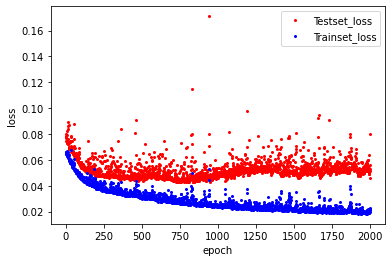

In [17]:
import matplotlib.pyplot as plt
x_len=np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c='red', markersize=2, label="Testset_loss")
plt.plot(x_len, y_loss, "o", c='blue', markersize=2, label="Trainset_loss")

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping_callback = Ea

Note: you may need to restart the kernel to use updated packages.
